### Disease unbalanced input data to RF (run1): analysis of classifier resutls

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
results = np.load('./results/RF_results_run1.npy').item()

In [4]:
print('Accuracy achieved: %.3f'%results['acc'])

Accuracy achieved: 1.000


In [5]:
print('Average precision achieved: %.3f'%results['average_precision'])

Average precision achieved: 1.000


In [5]:
mat = confusion_matrix(results['test_labels'], results['pred_labels'])

### Condusion matrix shows perfect separation between the two calsses
* Class 0: PolyA libraries
* Class 1: Ribo-deplete libraries

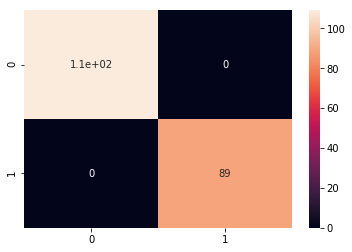

In [6]:
sns.heatmap(mat, annot=True)

In [7]:
importances = zip(results['importances'], results['genes'])

In [8]:
importances = sorted(importances, key = lambda x:x[0], reverse=True)


In [9]:
scores = list(map(lambda x:x[0], importances[:20]))
genes = list(map(lambda x:x[1], importances[:20]))

### Gene importance determined by RF classifier

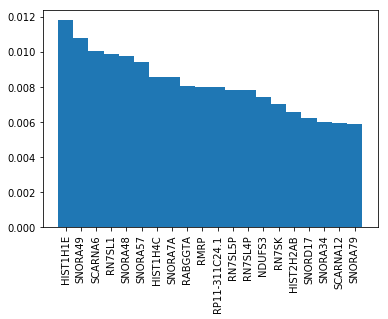

In [10]:
plt.bar(np.arange(len(scores)), scores, width=1)
plt.xticks(labels=genes, ticks=np.arange(len(scores)), rotation=90)
plt.show()
plt.close()

In [11]:
with open('/mnt/RiboVsPolyA/results/RF_gene_rank_run1.tsv', 'w') as f:
    f.write('Gene\tScore\n')
    for i in range(len(scores)):
        score = scores[i]
        gene = genes[i]
        f.write(gene+'\t'+str(score)+'\n')
        
    

#### Visualizing the effectiveness of the probability threshold
* Threshold of 0.5 seems to separate the two classes perfectly

Text(0.5, 1.0, 'Probability of being Ribo')

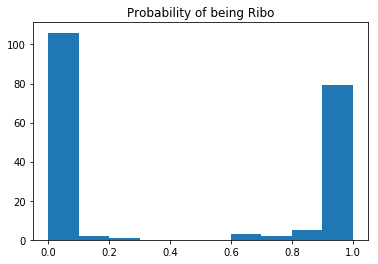

In [13]:
plt.hist(results['pred_proba'][:,1])
plt.title('Probability of being Ribo')